In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Fetch Random Samples From the Dataset(50%)

In [6]:
df.sample(frac=0.50,random_state=100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48573,41,Private,318046,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K
47252,41,Local-gov,33658,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K
33142,69,Private,312653,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
2965,21,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


Check Null values In The Dataset

In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

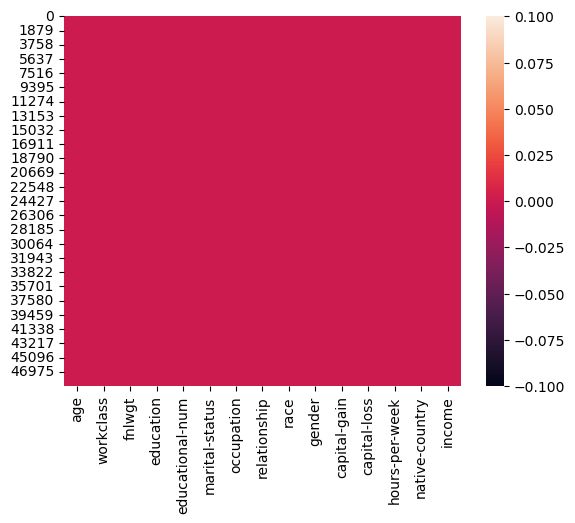

In [8]:
sns.heatmap(df.isnull())

Perform Data Cleaning [Replace '?' with NaN]

In [9]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
df['workclass'] = df['workclass'].replace('?',np.nan)

In [11]:
df['occupation'] = df['occupation'].replace('?',np.nan)

In [12]:
df['native-country'] = df['native-country'].replace('?',np.nan)

In [13]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

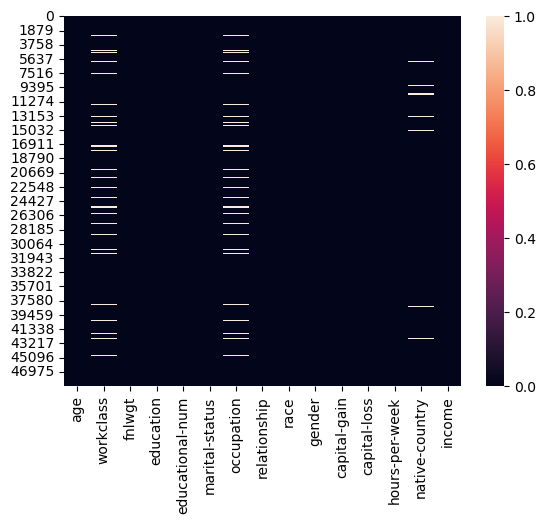

In [14]:
sns.heatmap(df.isnull())

Drop All The Missing Values

In [15]:
per_missing = df.isnull().sum()*100/len(df)
per_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [16]:
df.dropna(how='any',inplace=True)

In [17]:
per_missing = df.isnull().sum()*100/len(df)
per_missing

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

Check For Duplicate Data and Drop Them

In [18]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [19]:
dup = df.duplicated().any()
print("Are There any Duplicated Values in data",)

Are There any Duplicated Values in data


# Get Overall Statistic About The Dataframe

In [20]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222,4.522200e+04,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,NaN,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,1.897347e+05,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,1.056392e+05,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173882e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783160e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379260e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Drop The Columns education-num, capital-gain, and capital-loss

In [21]:
df.drop(['educational-num','capital-gain','capital-loss'],axis=1,inplace=True)

# Univariate Analysis:-

# What Is The Distribution of Age Column?

In [24]:
df['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

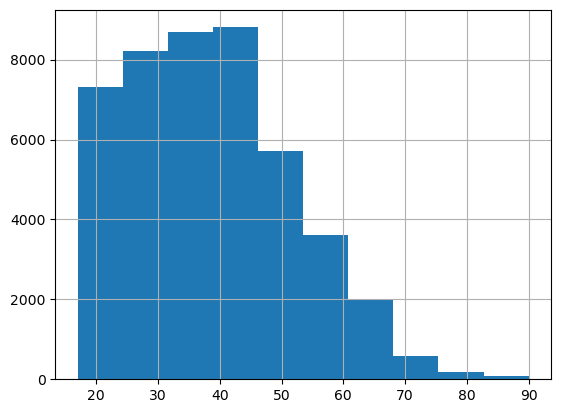

In [25]:
df['age'].hist()

# Find Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method

In [26]:
sum((df['age']>=17) & (df['age']<=48))

34902

In [27]:
sum(df['age'].between(17,48))

34902

# What is The Distribution of Workclass Column?

In [28]:
df['workclass'].describe()

count       45222
unique          7
top       Private
freq        33307
Name: workclass, dtype: object

<AxesSubplot:>

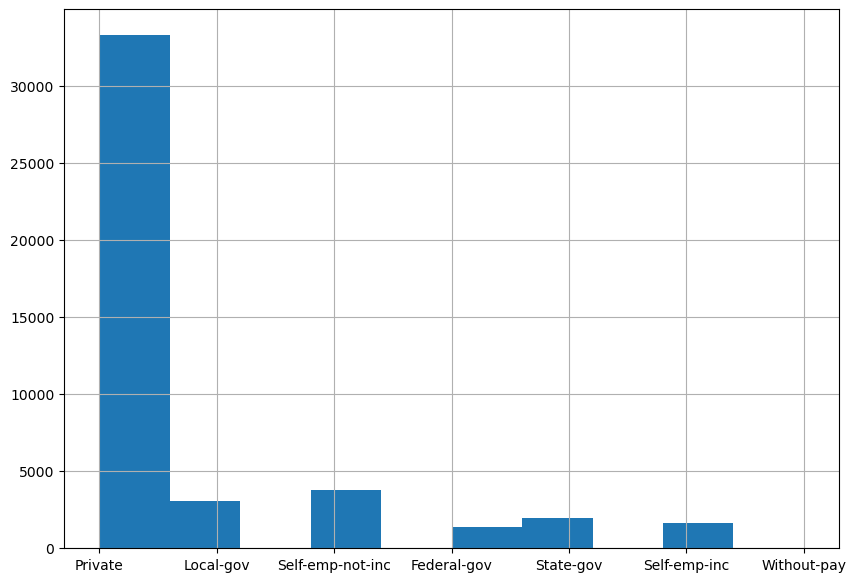

In [29]:
plt.figure(figsize=(10,7))
df['workclass'].hist()

# How Many Persons Having Bachelors and Masters Degree?

In [30]:
bac = df['education']=='Bachelors'
mas = df['education']=='Masters'

In [31]:
df[bac | mas ]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [32]:
sum(df['education'].isin(['Bachelors','Masters']))

10084

# Bivariate Analysis

<AxesSubplot:xlabel='income', ylabel='age'>

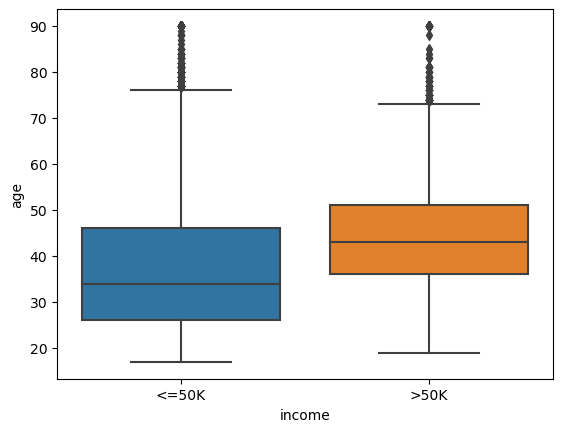

In [33]:
sns.boxplot(x='income',y='age',data=df)

# Replace Income Values[<=50k >50k] With 0 and 1

In [34]:
def income_data(data):
    if data =='<=50K':
        return 0
    else:
        return 1

In [35]:
df['encoded_salary'] = df['income'].apply(income_data)

In [36]:
# df['income'].replace(to_replace=['<=50K','>=50K'],value=[0,1],inplace=True)

# Which Workclass Getting The Highest Salary?

In [38]:
# df.groupby('workclass')['income'].mean().sort_values(ascending=False)

# Covert workclass Columns Datatype To Category Datatype

In [39]:
df['workclass'] = df['workclass'].astype('category')